In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


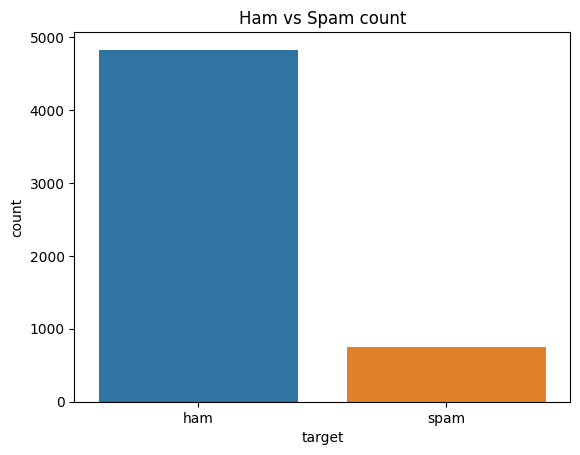

In [10]:
sns.countplot(x = 'target', data = df)
plt.title('Ham vs Spam count')
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target_num'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text,target_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [15]:
df.duplicated().sum()

403

In [16]:
df = df.drop_duplicates(keep = 'first')

In [17]:
df.duplicated().sum()

0

In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rishavghosh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
ps = PorterStemmer()

In [22]:
import re
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text)
        text = text.lower()
        x = text.split()
        x = [word for word in x if word.lower() not in stopwords.words('english')]
        x = [ps.stem(word) for word in x]
        text = ' '.join(x)
        return text
    else:
        return ''

In [24]:
x = df['text'].apply(clean_text)

In [25]:
x

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u u å750 pound prize 2 ...
5568                             ì_ b go esplanad fr home
5569                              piti mood soani suggest
5570    guy bitch act like id interest buy someth els ...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [28]:
y = df['target_num'].values

In [29]:
cv = CountVectorizer()
tv = TfidfVectorizer()

In [30]:
cX = cv.fit_transform(x)
tX = tv.fit_transform(x)

COUNT VECTORIZER RESULT

In [27]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(cX, y, test_size=0.2, random_state= 101)

In [32]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [33]:
test_pred = mnb.predict(x_test)

In [34]:
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred, average='weighted')
recall = recall_score(y_test, test_pred, average='weighted')
f1 = f1_score(y_test, test_pred, average='weighted')

print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1 Score:", f1)

Test Accuracy: 0.9777562862669246
Test Precision: 0.9781709636161691
Test Recall: 0.9777562862669246
Test F1 Score: 0.9779188232099039


In [35]:
cm = confusion_matrix(y_test, test_pred)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


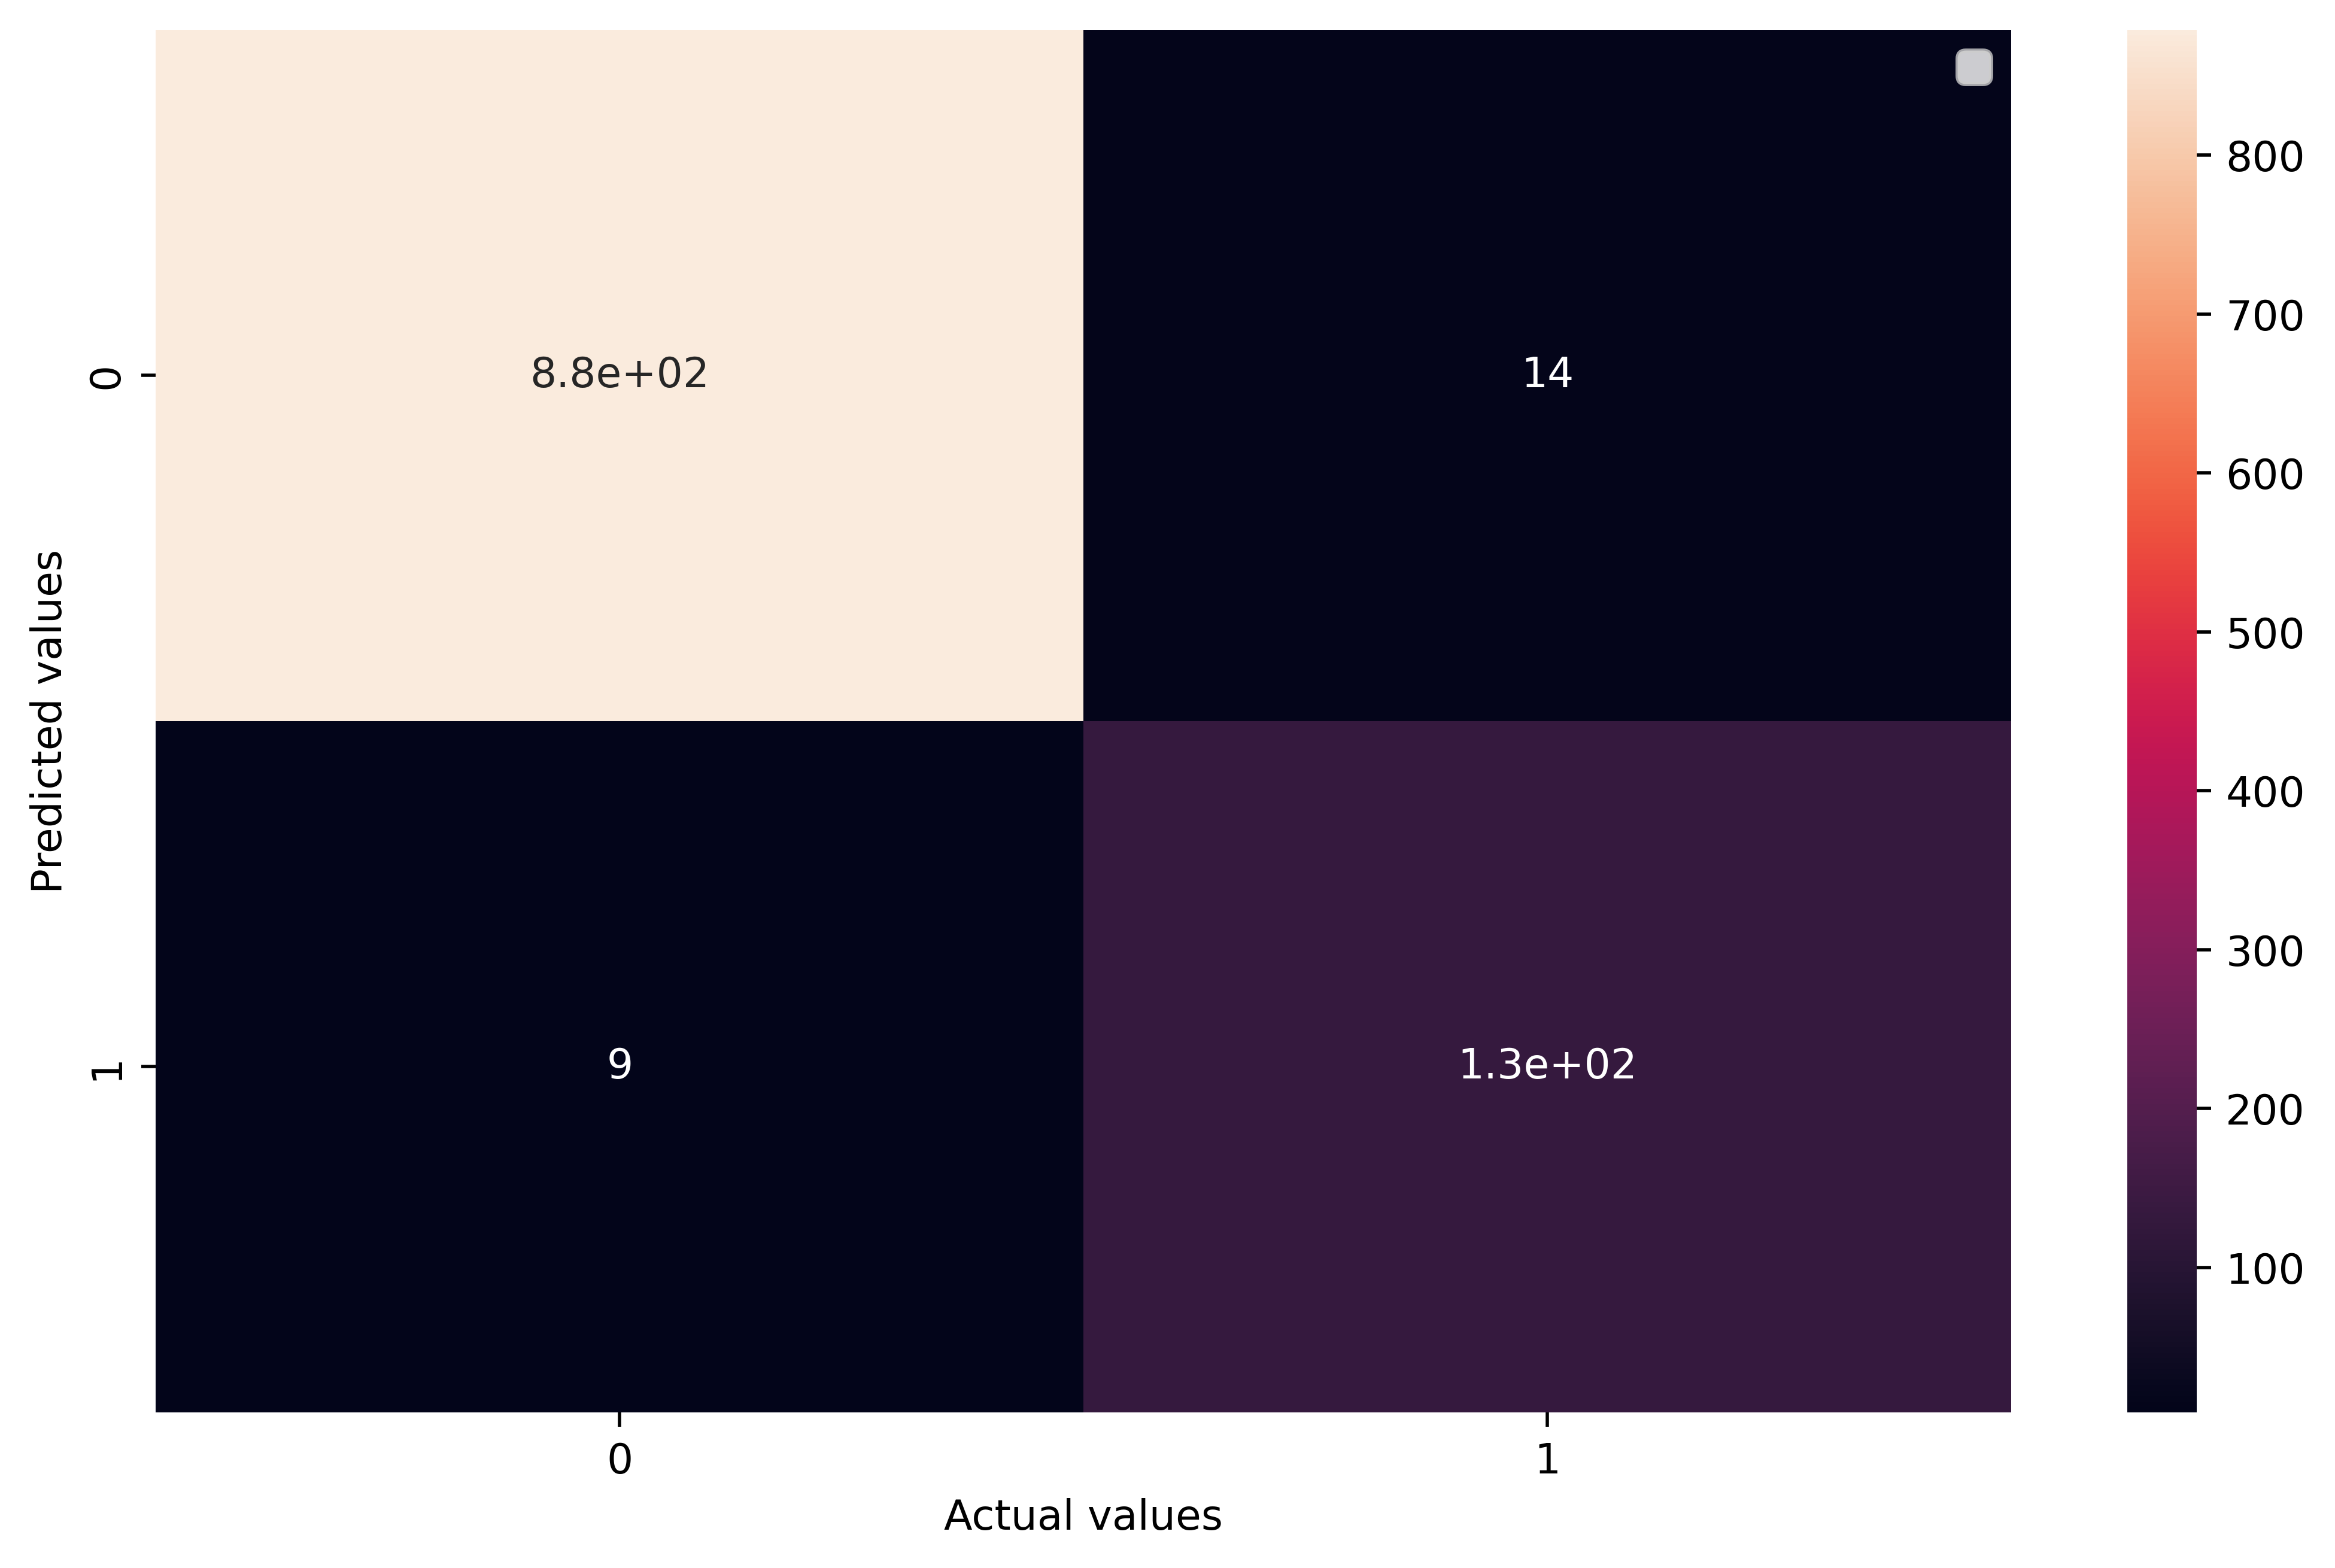

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 6), dpi = 500)
sns.heatmap(cm, annot = True)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()

TFID VECTORIZER RESULT

In [37]:
x_train, x_test, y_train, y_test = train_test_split(tX, y, test_size=0.2, random_state= 101)

In [38]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [39]:
test_pred = mnb.predict(x_test)

In [40]:
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred, average='weighted')
recall = recall_score(y_test, test_pred, average='weighted')
f1 = f1_score(y_test, test_pred, average='weighted')

print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1 Score:", f1)

Test Accuracy: 0.9506769825918762
Test Precision: 0.9533416795069337
Test Recall: 0.9506769825918762
Test F1 Score: 0.9459169029120036


In [41]:
cm = confusion_matrix(y_test, test_pred)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


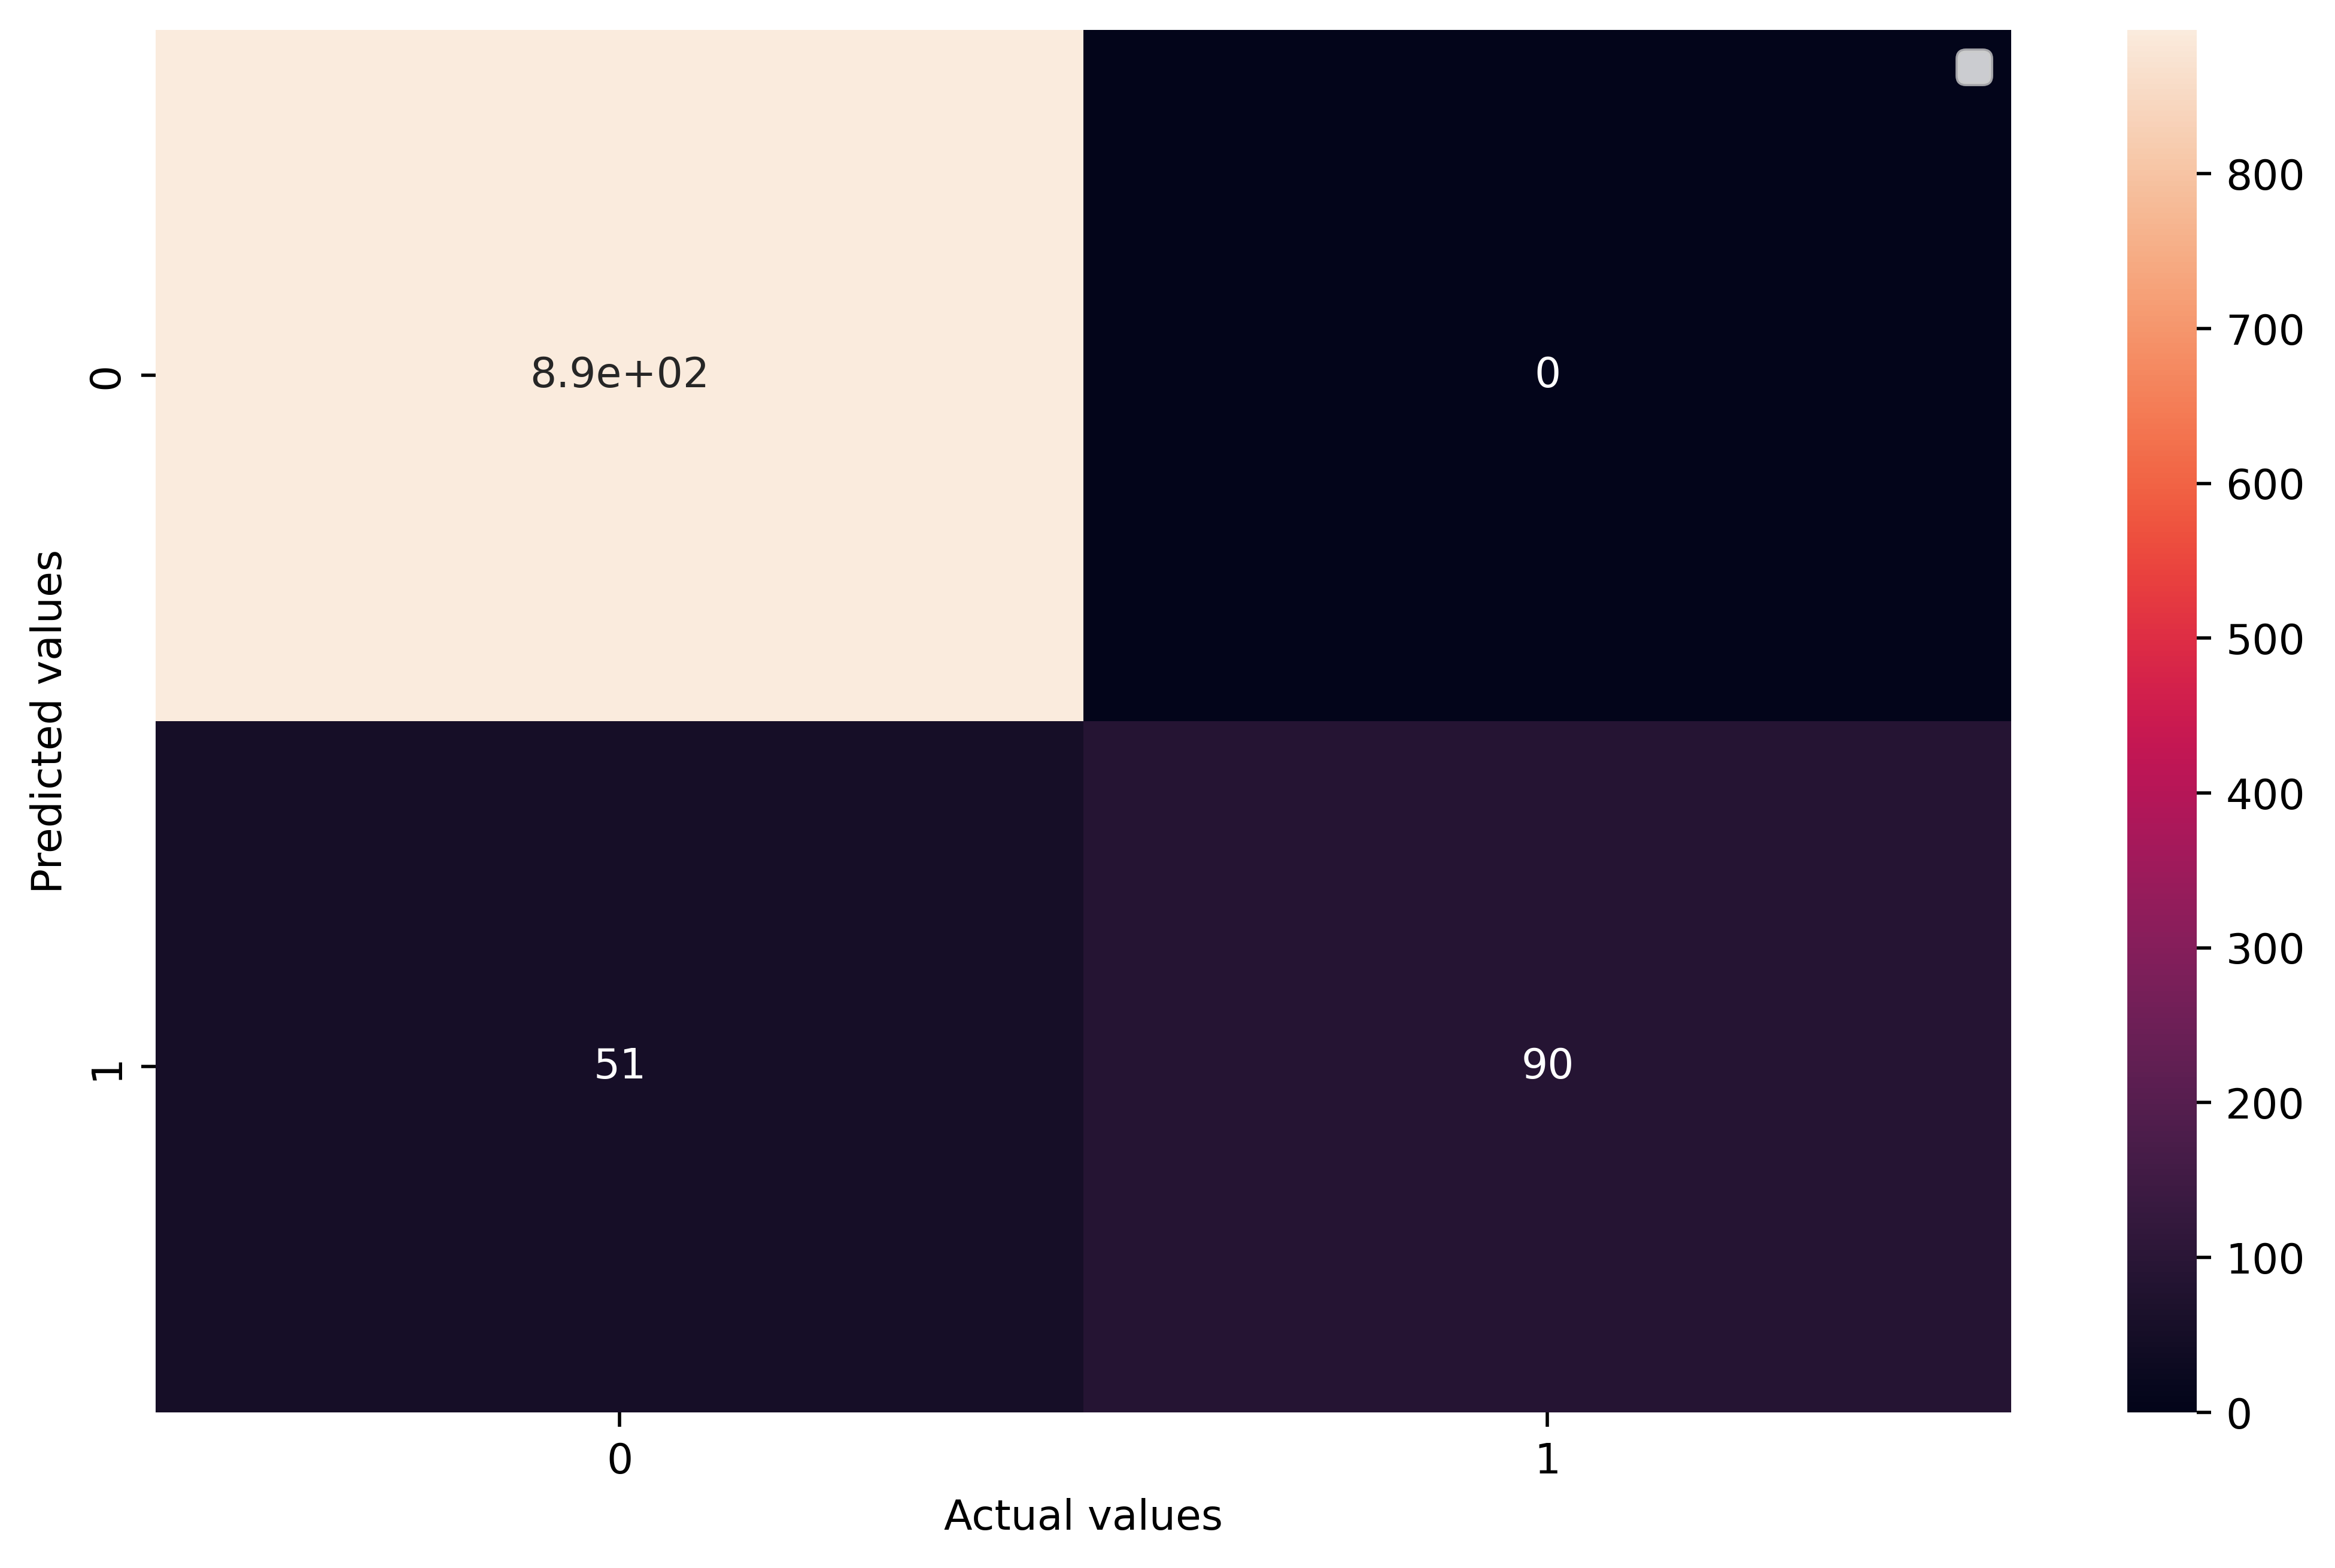

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 6), dpi = 500)
sns.heatmap(cm, annot = True)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()